# Hipótesis Primera

Se ha realizado un pequeño cambio en la hipótesis presentada al inicio.
Finalmente se decide estudiar si **en los últimos años se ha producido un cambio significativo en los patrones del viento y las lluvias** y la **relación viento-lluvia**.

## Primera observación y limpieza de los datos
<br>

In [1]:
# Librerías necesarias en primera instancia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Para los mapas, se puede utilizar la librería 'geopandas':
#http://www.geomapik.com/desarrollo-programacion-gis/mapas-con-python-geopandas-matplotlib/

# Mapas avanzados con plotly
# http://www.geomapik.com/desarrollo-programacion-gis/mapas-plotly-visualizacion-datos-espaciales/

#Dashboard tutorial
#https://www.youtube.com/watch?v=bDXypNBH1uw

In [2]:
# Cargo el csv de los datos sobre las lluvias en Australia
aus_df = pd.read_csv('../data/weatherAUS.csv', encoding='latin1')
aus_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Utilizo los métodos de info() y describe() para obtener información del dataset a grandes rasgos
aus_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
print('Tamaño del dataset: ', aus_df.shape, '\n\n')
aus_df.info()

Tamaño del dataset:  (145460, 23) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float

In [5]:
aus_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Text(0.5, 1.0, 'Missing data')

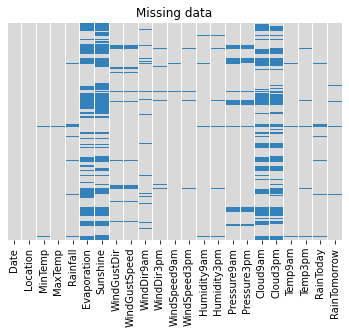

In [6]:
# Se genera un gráfico para facilitar la visualización de la distribución de lo nulos
sns.heatmap(aus_df.isnull(), yticklabels = False, cbar = False, cmap='tab20c_r')
plt.title('Missing data')

In [7]:
# Como complemento al gráfico, se crea un dataframe para obtener datos numéricos sobre la distribución de los missing data.
# ELos indices de este dataframe son las columnas del DataFrame sobre las lluvias en Australia (aus_df).
# En la primera columna se muestra el número total de nulos, y en la segunda, el porcentaje respecto al numero total de filas.
pd.DataFrame({'Nuls':pd.Series(aus_df.isnull().sum()).sort_values(ascending = False),
              '%': round((pd.Series(aus_df.isnull().sum()).sort_values(ascending = False)/aus_df.shape[0])*100, 2)})

,Nuls,%
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


Con el gráfico y el DataFrame generados, se observan gran cantidad de nulos en las siguientes columnas:
* Sunshine
* Evaporation
* Cloud3pm
* Cloud9am

Por el momento, estas columnas no afecta al desarrollo del EDA para el análisis de la hipótesis.

## ¿En qué zonas del país se ha llevado a cabo la recogida de datos? ¿En qué periodos?

In [8]:
meassure_locs = aus_df.Location.unique().tolist()
print(meassure_locs)
len(meassure_locs)

['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


49

In [9]:
aus_df['Date'] #Importar de la página web Australiana los datos correspondientes a estas fechas

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, Length: 145460, dtype: object

Es bueno también, conocer el número mediciones por localización:

In [10]:
aus_df.groupby('Location').count()[['Date']] 
# Se muestra solo esta columna porque, como se mostró anteriormente, no existen nulos en esta columna

,Date
Location,
Adelaide,3193
Albany,3040
Albury,3040
AliceSprings,3040
BadgerysCreek,3009
Ballarat,3040
Bendigo,3040
Brisbane,3193
Cairns,3040


In [11]:
city =aus_df.Location.unique().tolist()
city
#Esta lista la utilizaré para crear un diccinario con las coordenadas

['Albury',
 'BadgerysCreek',
 'Cobar',
 'CoffsHarbour',
 'Moree',
 'Newcastle',
 'NorahHead',
 'NorfolkIsland',
 'Penrith',
 'Richmond',
 'Sydney',
 'SydneyAirport',
 'WaggaWagga',
 'Williamtown',
 'Wollongong',
 'Canberra',
 'Tuggeranong',
 'MountGinini',
 'Ballarat',
 'Bendigo',
 'Sale',
 'MelbourneAirport',
 'Melbourne',
 'Mildura',
 'Nhil',
 'Portland',
 'Watsonia',
 'Dartmoor',
 'Brisbane',
 'Cairns',
 'GoldCoast',
 'Townsville',
 'Adelaide',
 'MountGambier',
 'Nuriootpa',
 'Woomera',
 'Albany',
 'Witchcliffe',
 'PearceRAAF',
 'PerthAirport',
 'Perth',
 'SalmonGums',
 'Walpole',
 'Hobart',
 'Launceston',
 'AliceSprings',
 'Darwin',
 'Katherine',
 'Uluru']

In [12]:
print(aus_df.RainToday.value_counts())
print(aus_df.RainTomorrow.value_counts())

#Compruebo que solo tenga Yes y No

No     110319
Yes     31880
Name: RainToday, dtype: int64
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


In [13]:
#Modifico los datos de las columnas de RainToday y RainTomorrow
aus_df.loc[aus_df['RainToday']=='Yes','RainToday'] = 1
aus_df.loc[aus_df['RainToday']=='No','RainToday'] = 0
aus_df.loc[aus_df['RainTomorrow']=='Yes','RainTomorrow'] = 1
aus_df.loc[aus_df['RainTomorrow']=='No','RainTomorrow'] = 0

In [14]:
aus_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [15]:
#Compruebo que los numeros coinciden
print(aus_df.RainToday.value_counts())
print(aus_df.RainTomorrow.value_counts())

0    110319
1     31880
Name: RainToday, dtype: int64
0    110316
1     31877
Name: RainTomorrow, dtype: int64


## Fechas

In [16]:
from datetime import datetime
print('Tipo de dato en la columna fecha:', type(aus_df.loc[2,'Date']))
aus_df['Date']=pd.to_datetime(aus_df['Date'])
print('Tipo de dato en la columna fecha después de la transformación:', type(aus_df.loc[2,'Date']))
aus_df['Year'] = aus_df['Date'].dt.year
aus_df['Month'] = aus_df['Date'].dt.month


Tipo de dato en la columna fecha: <class 'str'>
Tipo de dato en la columna fecha después de la transformación: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [17]:
# Pongo la columna Date como índice
aus_df.index = aus_df['Date']
aus_df.drop('Date', axis = 1, inplace = True)

In [18]:
aus_df.head().append(aus_df.tail())

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6
2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6


Los datos en 2008 comienzan en didiembre, y los últimos datos de 2017 son de junio.
Para facilitar el cálculo, descartamos estos datos de los años incompletos.

In [19]:
aus_df = aus_df[(aus_df.index>'2009') & (aus_df.index<'2017')]
aus_df.head().append(aus_df.tail())

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,Albury,9.6,23.9,0.0,NaN,NaN,W,41.0,WSW,SSW,...,1014.4,1013.1,NaN,NaN,14.9,22.1,0,0,2009,1
2009-01-03,Albury,10.5,28.8,0.0,NaN,NaN,SSE,26.0,SSE,E,...,1018.7,1014.8,NaN,NaN,17.1,26.5,0,0,2009,1
2009-01-04,Albury,12.3,34.6,0.0,NaN,NaN,WNW,37.0,SSE,NW,...,1015.1,1010.3,NaN,NaN,20.7,33.9,0,0,2009,1
2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,ENE,NW,...,1012.6,1009.2,NaN,NaN,22.4,34.4,0,0,2009,1
2009-01-06,Albury,13.7,37.9,0.0,NaN,NaN,W,52.0,SE,WNW,...,1010.9,1006.7,NaN,NaN,23.1,36.8,0,0,2009,1
2016-12-27,Uluru,22.1,35.8,63.8,NaN,NaN,WNW,43.0,WNW,W,...,997.8,995.2,4.0,2.0,26.0,33.5,1,0,2016,12
2016-12-28,Uluru,22.6,36.8,0.0,NaN,NaN,NW,50.0,NW,W,...,1000.0,998.8,NaN,NaN,29.7,34.0,0,0,2016,12
2016-12-29,Uluru,23.2,38.0,0.0,NaN,NaN,SSW,33.0,S,WSW,...,1004.4,1001.0,NaN,NaN,28.7,36.4,0,0,2016,12
2016-12-30,Uluru,19.7,37.0,0.0,NaN,NaN,E,37.0,ESE,W,...,1004.6,1000.9,NaN,NaN,28.2,35.1,0,0,2016,12


## Viento

In [20]:
aus_df['WindGustDir'].unique()

array(['W', 'SSE', 'WNW', 'NE', 'S', 'SW', 'NNW', 'NW', 'SE', 'WSW',
       'NNE', 'N', 'ESE', nan, 'E', 'SSW', 'ENE'], dtype=object)

Con los datos disponibles se puede obtener información sobre la dirección mayoritaria del viento en Australia y por localización

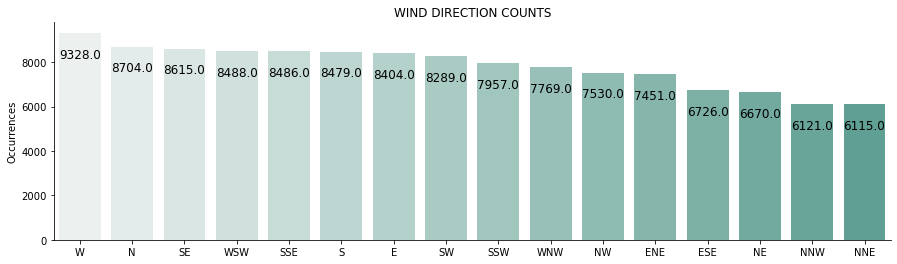

In [214]:
fig_wind_counts, ax = plt.subplots(figsize = (15,4))

ax = sns.barplot(x = aus_df.WindGustDir.value_counts().index,
                 y = aus_df.WindGustDir.value_counts(),
                 palette='light:#5A9')

ax.set(title = 'WIND DIRECTION COUNTS', ylabel = 'Occurrences')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='top', color='black', size=12)

    sns.despine()
#fig_wind_counts.savefig(fname='../Wind_per_dir.png', transparent=True)

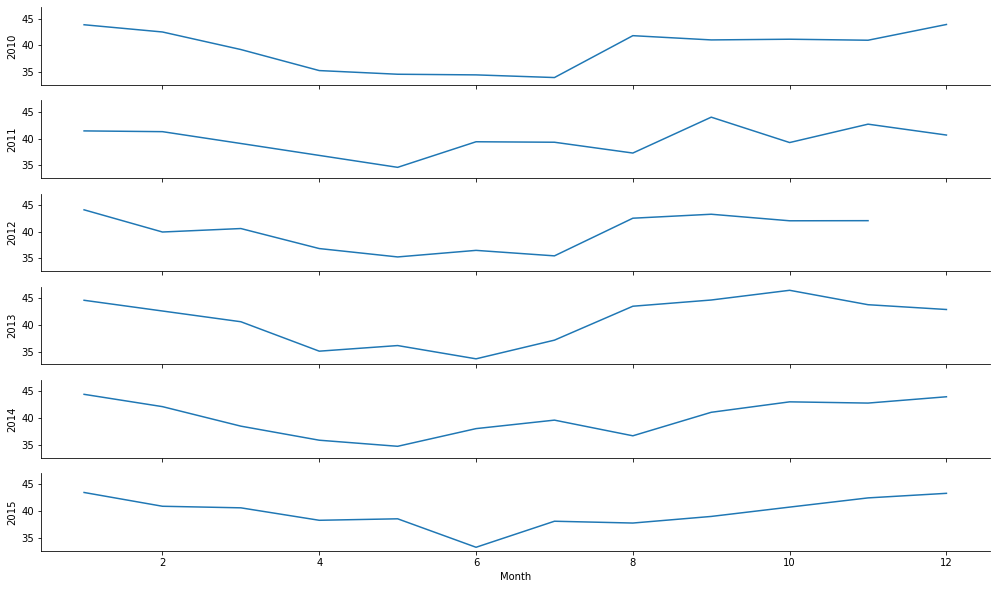

In [333]:
fig_wind_year, ax = plt.subplots(len(range(aus_df.Year.min()+1,aus_df.Year.max())), figsize = (17,10), sharex=True, sharey = True)

for n, year in enumerate(range(aus_df.Year.min()+1,aus_df.Year.max())):
    ax[n]=sns.lineplot(x = aus_df.loc[aus_df['Year']==year,'Month'],
                       y = aus_df.loc[aus_df['Year']==year,'WindGustSpeed'],
                       ax=ax[n])
    ax[n].set(ylabel = str(year))
    sns.despine()


In [23]:
# groups = aus_df.WindGustSpeed.groupby(pd.Grouper(freq = 'A'))
# years = pd.DataFrame()

# for name, group in groups:
#     years[name.year] = group.values
# years.plot(subplots = True, legend = False, figsize = (12,10))


#Este código dará error porque en 2012 no hay datos de diciembre


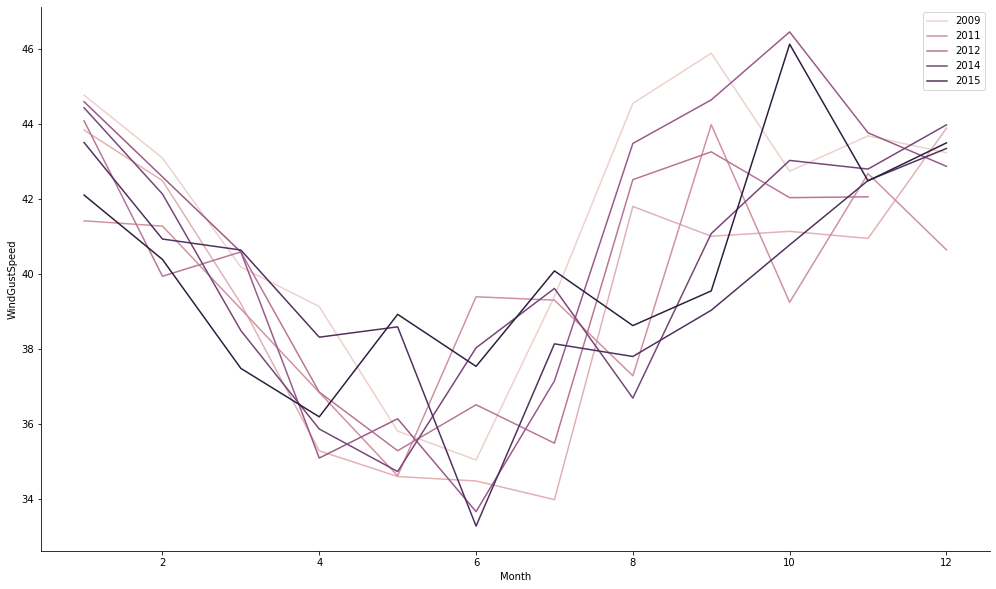

In [336]:
fig, ax = plt.subplots(figsize = (17,10), sharex=True)
sns.lineplot(x = aus_df.Month, y = aus_df.WindGustSpeed, hue=aus_df.Year)
    
ax.legend(loc = 'best')
sns.despine()

<AxesSubplot:xlabel='Date'>

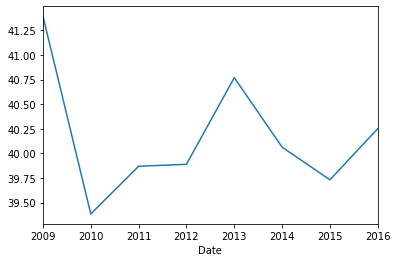

In [25]:
aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['WindGustSpeed'].mean().plot()

In [26]:
wind_2009 = aus_df.loc[(aus_df.index>'2009') & (aus_df.index<'2010'), 'WindGustSpeed']
wind_2010 = aus_df.loc[(aus_df.index>'2010') & (aus_df.index<'2011'), 'WindGustSpeed']
wind_2011 = aus_df.loc[(aus_df.index>'2011') & (aus_df.index<'2012'), 'WindGustSpeed']
wind_2012 = aus_df.loc[(aus_df.index>'2012') & (aus_df.index<'2013'), 'WindGustSpeed']
wind_2013 = aus_df.loc[(aus_df.index>'2013') & (aus_df.index<'2014'), 'WindGustSpeed']
wind_2014 = aus_df.loc[(aus_df.index>'2014') & (aus_df.index<'2015'), 'WindGustSpeed']
wind_2015 = aus_df.loc[(aus_df.index>'2015') & (aus_df.index<'2016'), 'WindGustSpeed']
wind_2016 = aus_df.loc[(aus_df.index>'2016') & (aus_df.index<'2017'), 'WindGustSpeed']

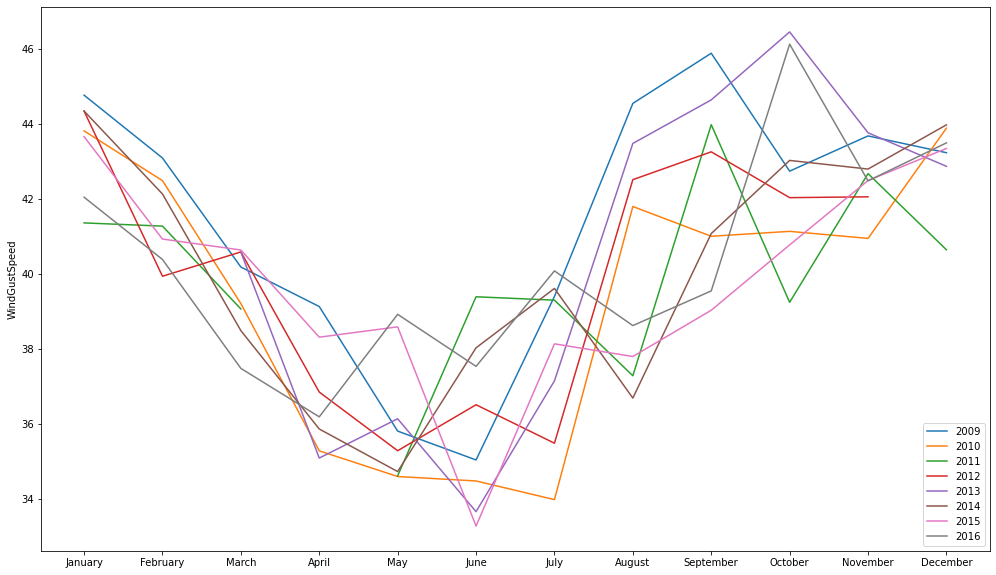

In [27]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']
# wind_2009.resample('M').mean().plot(figsize = (12,9), style = ':')
fig, ax = plt.subplots(figsize = (17,10), sharex=True)

sns.lineplot(x=months, y = wind_2009.resample('M').mean())
sns.lineplot(x=months, y = wind_2010.resample('M').mean())
sns.lineplot(x=months, y = wind_2011.resample('M').mean())
sns.lineplot(x=months[0:11], y = wind_2012.resample('M').mean())
sns.lineplot(x=months, y = wind_2013.resample('M').mean())
sns.lineplot(x=months, y = wind_2014.resample('M').mean())
sns.lineplot(x=months, y = wind_2015.resample('M').mean())
sns.lineplot(x=months, y = wind_2016.resample('M').mean())

plt.legend(['2009', '2010', '2011','2012','2013','2014','2015','2016'],
          loc = 'lower right')

In [28]:
wind_2012

Date
2012-01-02    24.0
2012-01-03    43.0
2012-01-04    35.0
2012-01-05    35.0
2012-01-06    31.0
              ... 
2012-11-26    39.0
2012-11-27    35.0
2012-11-28    31.0
2012-11-29    43.0
2012-11-30    35.0
Name: WindGustSpeed, Length: 15363, dtype: float64

<AxesSubplot:xlabel='Date'>

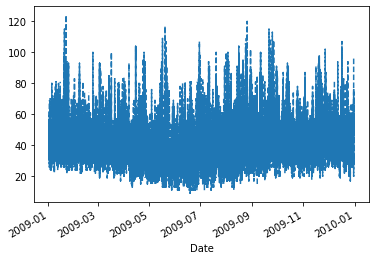

In [29]:
wind_2009.plot(style = '--')

In [350]:
speed_max = aus_df['WindGustSpeed'].groupby(aus_df['WindGustSpeed'].index.year).max()

Date
2009    124.0
2010    135.0
2011    135.0
2012    115.0
2013    117.0
2014    130.0
2015    135.0
2016    120.0
Name: WindGustSpeed, dtype: float64

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x979.2 with 9 Axes>,
 array([<AxesSubplot:ylabel='2009'>, <AxesSubplot:ylabel='2010'>,
        <AxesSubplot:ylabel='2011'>, <AxesSubplot:ylabel='2012'>,
        <AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>],
       dtype=object))

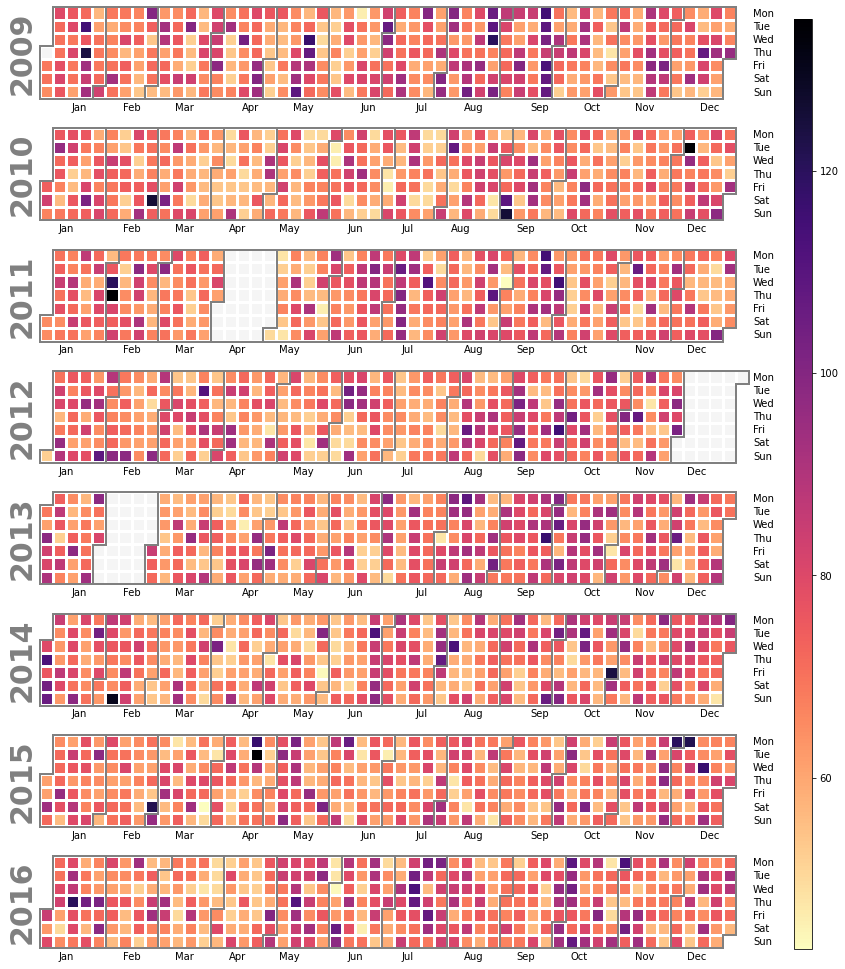

In [30]:
import calplot
calplot.calplot(how = 'max',data=aus_df.WindGustSpeed, cmap='magma_r', linewidth = 2,colorbar=True)

In [31]:
aus_df.WindGustSpeed.max()

135.0

## Lluvia

### Zonas con mayor y menor volumne de precipitación

In [32]:
aus_df.groupby('Location')['Rainfall'].sum().sort_values(ascending = False).head(10)
aus_df.groupby('Location')['Rainfall'].sum().sort_values(ascending = False).tail(10)

Location
Melbourne       4049.6
Nuriootpa       4016.1
Katherine       3859.9
Cobar           3259.6
SalmonGums      2767.8
Mildura         2737.6
AliceSprings    2544.2
Woomera         1363.7
Nhil            1302.0
Uluru           1049.6
Name: Rainfall, dtype: float64

Text(0.5, 0.98, 'AVERAGE RAIN PER LOCATION')

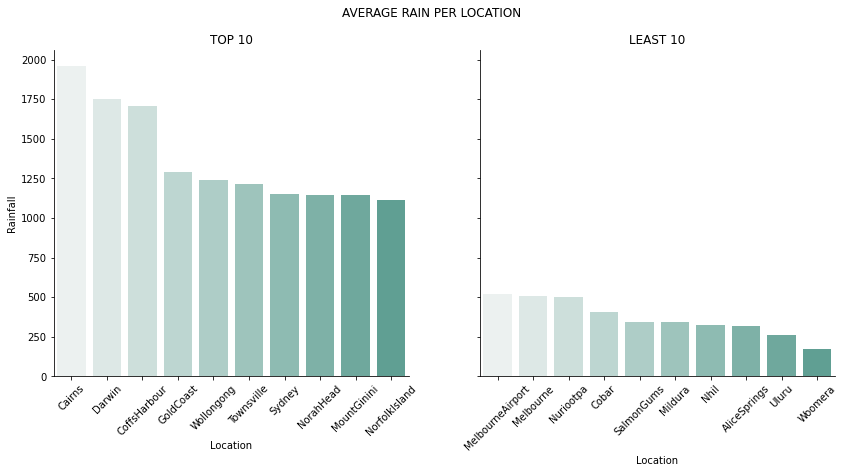

In [172]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6), sharey=True)

rain_per_loc = aus_df.groupby(['Location', 'Year']).sum().groupby('Location').mean()['Rainfall']


ax1=sns.barplot(x = rain_per_loc.sort_values(ascending = False).head(10).index,
           y = rain_per_loc.sort_values(ascending = False).head(10),
               ax=ax1, palette='light:#5A9')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set(title = 'TOP 10')


ax2=sns.barplot(x = rain_per_loc.sort_values(ascending = False).tail(10).index,
           y = rain_per_loc.sort_values(ascending = False).tail(10),
               ax = ax2, palette='light:#5A9')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set(ylabel='', title = 'LEAST 10')

sns.despine()
fig.suptitle('AVERAGE RAIN PER LOCATION')

In [35]:
aus_df.groupby(['Location', 'Year']).sum().groupby('Location').mean()['Rainfall'].sort_values(ascending = False)

Location
Cairns              1961.2500
Darwin              1752.0250
CoffsHarbour        1704.8500
GoldCoast           1291.8000
Wollongong          1238.6250
Townsville          1216.8250
Sydney              1150.3250
NorahHead           1146.1500
MountGinini         1142.7000
NorfolkIsland       1113.0000
Brisbane            1097.3000
Newcastle           1084.2125
Williamtown         1056.6125
SydneyAirport       1046.7000
Witchcliffe         1027.0250
Walpole              977.3250
Katherine            964.9750
Portland             901.5000
Albany               819.1125
Tuggeranong          767.4250
Dartmoor             751.6250
Penrith              747.8000
BadgerysCreek        740.1000
MountGambier         736.0250
Launceston           727.6125
Richmond             721.4750
Albury               690.5250
Perth                666.3750
Watsonia             663.6000
PerthAirport         630.6750
Canberra             629.9750
WaggaWagga           617.8500
Ballarat             613.2000
H

### Cantidad de precipitación caída por año

<AxesSubplot:xlabel='Date'>

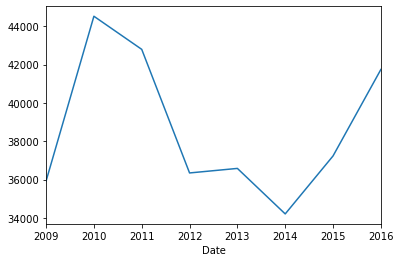

In [36]:

aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['Rainfall'].sum().plot()

# sns.lineplot(x=months, y = wind_2009.resample('M').mean())

No handles with labels found to put in legend.


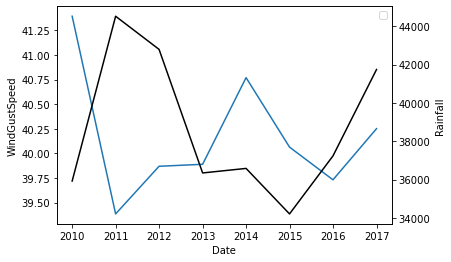

In [37]:
sns.lineplot(x=aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['WindGustSpeed'].mean().index,
             y = aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['WindGustSpeed'].mean())

ax2 = plt.twinx()

sns.lineplot(x=aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['Rainfall'].sum().index,
             y = aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['Rainfall'].sum(), ax = ax2,
             color = 'k')
plt.legend()
#https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html

### Cada cuánto tiempo llueve en Australia??

(<Figure size 900x979.2 with 9 Axes>,
 array([<AxesSubplot:ylabel='2009'>, <AxesSubplot:ylabel='2010'>,
        <AxesSubplot:ylabel='2011'>, <AxesSubplot:ylabel='2012'>,
        <AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>],
       dtype=object))

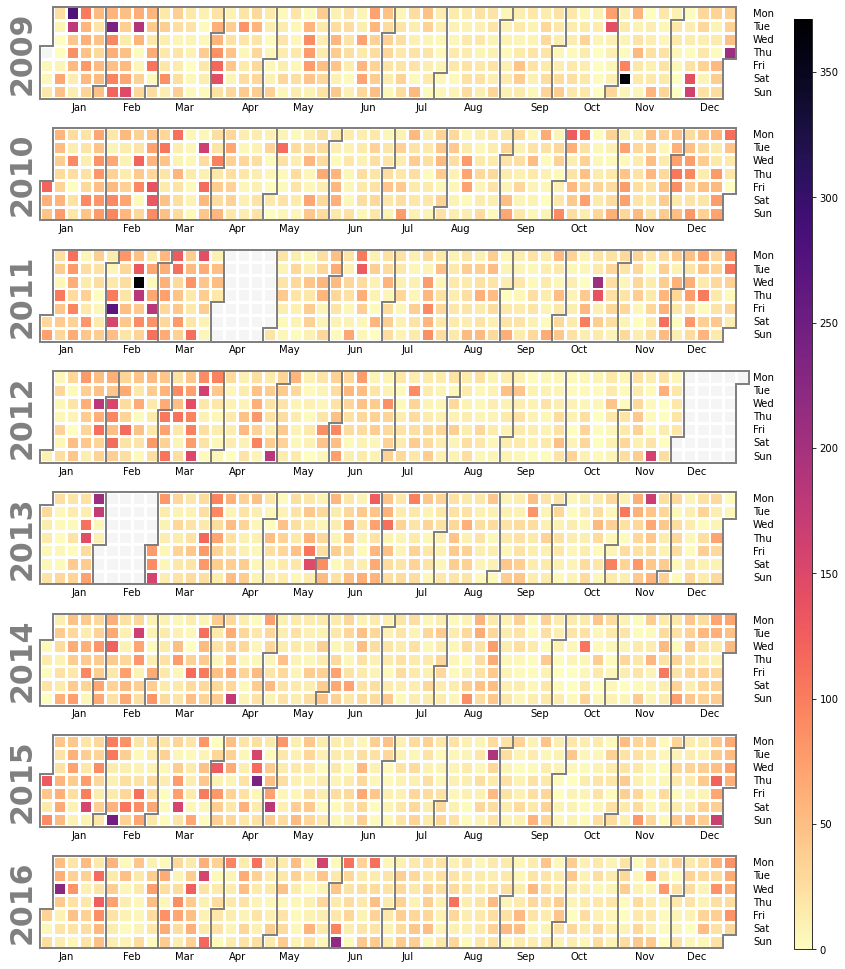

In [38]:
import calplot
calplot.calplot(how = 'max',data=aus_df.Rainfall, cmap='magma_r', linewidth = 2,colorbar=True)

## Temperatura

In [ ]:
import calplot
calplot.calplot(how = 'max',data=aus_df.MaxTemp, cmap='magma_r', linewidth = 2,colorbar=True)

In [ ]:
aus_df.MaxTemp.max()

## Relación lluvia viento

<Figure size 432x288 with 0 Axes>

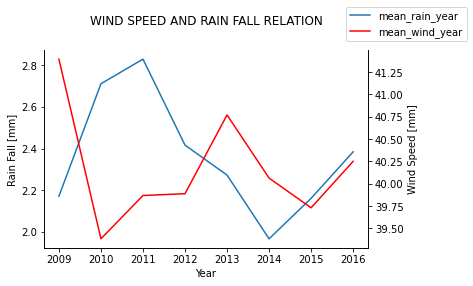

In [162]:
fig_maxwindspeed_rainfall = plt.figure()
data = pd.DataFrame({'Year': np.array(aus_df.groupby(aus_df.index.year)['WindGustSpeed'].mean().index),
                    'mean_rain_year': aus_df.groupby(aus_df.index.year)['Rainfall'].mean(),
                    'mean_wind_year': aus_df.groupby(aus_df.index.year)['WindGustSpeed'].mean()})


ax1 = data.plot(x = 'Year', y = 'mean_rain_year', legend = False)
plt.ylabel('Rain Fall [mm]')
ax2 = ax1.twinx()
data.plot(x = 'Year', y = 'mean_wind_year', ax = ax2, legend = False, color = 'r')
ax1.figure.legend(loc = 1, bbox_to_anchor=(1.1, 1))
sns.despine(right = False)
plt.ylabel('Wind Speed [mm]')
plt.title('WIND SPEED AND RAIN FALL RELATION', y = 1.1)
plt.tight_layout()

fig_maxwindspeed_rainfall.savefig(fname='../fig_windir_rain.png', transparent=True)

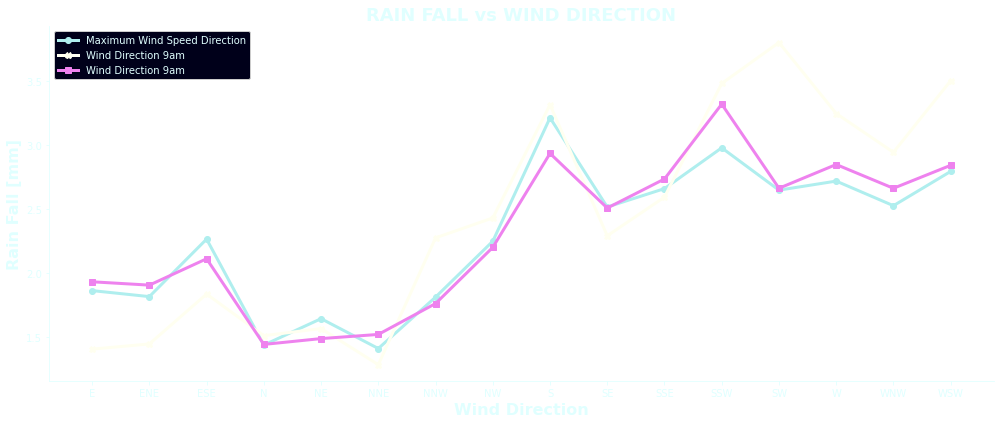

In [326]:
'''
This pot shows the relation between the rain fall [mm] and the direction of the wind
Figure with soft colors for the presentation.

'''
#Create figure
fig_windir_rain, ax = plt.subplots(figsize=(14,6))

#Create dataframe to plot the data
data = pd.DataFrame({'Wind_dir_max_Speed': aus_df.groupby('WindGustDir').mean()['Rainfall'],
                    'Wind_dir_9am': aus_df.groupby('WindDir9am').mean()['Rainfall'],
                    'Wind_dir_3pm': aus_df.groupby('WindDir3pm').mean()['Rainfall']})

#Colores:
colors = ['paleturquoise', 'ivory', 'violet']
markers = ['o', 'X', 's']
# Loop to define colors and markers
for i in range(data.shape[1]):
    plt.plot(data.iloc[:,i], color = colors[i], marker = markers[i], linewidth = 3)


# Modify legend
L = plt.legend(labels = ['Maximum Wind Speed Direction', 'Wind Direction 9am', 'Wind Direction 9am'],loc = 'upper left')
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((0, 0, 0.1, 0.1))
for text in L.get_texts():
     text.set_color("lightcyan")
    
    
# Titles and labels
plt.title('RAIN FALL vs WIND DIRECTION', fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})
plt.ylabel ('Rain Fall [mm]', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
plt.xlabel('Wind Direction', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
sns.despine()


#Spines
ax.spines['bottom'].set_color('lightcyan')

ax.spines['left'].set_color('lightcyan')

ax.tick_params(axis='both', colors='lightcyan',)

plt.tight_layout()

fig_windir_rain.savefig(fname='../fig_windir_rain.png', transparent=True)

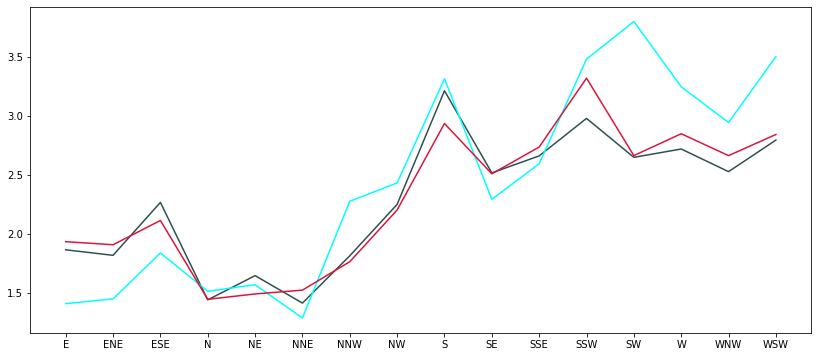

In [312]:
fig_windir_rain, ax = plt.subplots(figsize=(14,6))
data = pd.DataFrame({'Wind_dir_max_Speed': aus_df.groupby('WindGustDir').mean()['Rainfall'],
                    'Wind_dir_9am': aus_df.groupby('WindDir9am').mean()['Rainfall'],
                    'Wind_dir_3pm': aus_df.groupby('WindDir3pm').mean()['Rainfall']})
colors = ['darkslategray', 'aqua', 'crimson']
#Colores:
for i in range(data.shape[1]):
    plt.plot(data.iloc[:,i], color = colors[i])